# 10장_케라스를_사용한_인공신경망_소개

1. 수백만 개의 이미지 분류
2. 음성 인식 서비스의 성능 높이기
3. 좋은 비디오 추천
4. 수백만 개의 기보를 익히고 자기 자신과 게임하면서 학습하는 알파고

<다룰 내용>
- 다층 퍼셉트론
- 케라스 API를 사용하여 인공 신경망 구현하는 방법


## 10.1 생물학적 뉴런에서 인공 뉴런까지
인공 신경망이 우리 생활에 커다란 영향을 준다는 근거
1. 훈련하기 위한 데이터가 매우 많아짐
2. 하드웨어 크게 발전, 클라우드 플랫폼 등장
3. 훈련 알고리즘 향상
3. 지역 최적점에 도달하더라고 일반적으로 전역 최적점에 매우 가깝다.
4. 인공 신경망을 기반으로한 기술들이 계속해서 향상될 것이다.

### 퍼셉트론
- 가장 간단한 인공 신경망 구조 중 하나
- 입력, 출력이 어떤 숫자이고, 각각의 입력 연결은 가중치와 연관되어 있다.
- 입력의 가중치 합을 계산한 뒤 계산된 합에 step function을 적용하여 결과 출력한다.
- 
image.png
- 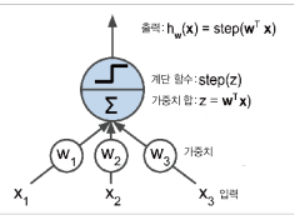

- 완전 연결 층(밀집 층): 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때
- 입력층: 모두 입력 뉴런으로 구성됨, 편향 특성이 더해진다.
- 입력 2개와 출력 3개로 구성된 퍼셉트론
  - 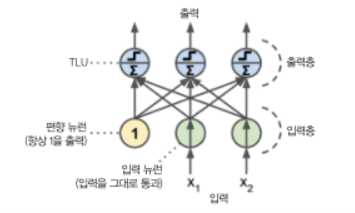
- 헤브의 규칙: 퍼셉트론의 훈련 알고리즘
- 퍼셉트론 학습 규칙
  - 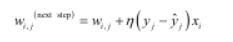
- 퍼셉트론 수렴 이론: 훈련 샘플이 선형적으로 구분될 수 있다면 알고리즘이 정답에 수렴한다.

In [ ]:
# Perceptron 클래스 제공
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # 꽃잎의 길이와 너비
y = (iris.target == 0).astype(np.int) # 부채붓꽃(iris setosa)인가?

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])

<ipython-input-2-4d77ef44d33c>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) # 부채붓꽃(iris setosa)인가?


- 로지스틱 회귀 분류기 vs 퍼셉트론 => 로지스틱 회귀
- 퍼셉트론은 클래스 확률을 제공하지 않으며 고정된 임곗값을 기준으로 예측을 만든다.

- 다층 퍼셉트론
  - 퍼셉트론을 여러 개 쌓아 올린 것
  - XOR 문제를 풀 수 있다.
  - 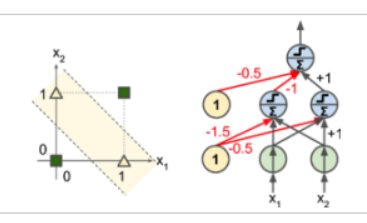

### 다층 퍼셉트론과 역전파
- 입력층, 은닉층, 출력층
- 출력층을 제외하고 모든 층은 편향 뉴런을 포함하며 완전 연결되어있다.
- FNN: 입력에서 출력으로 한 방향으로만 흐른다.
- 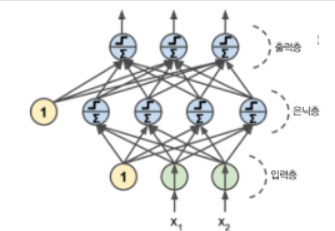


- 심층 신경망(DNN, 딥러닝): 은닉층을 여러 개 쌓아 올린 인공 신경망
- 역전파: 정방향 한 번, 역방향 한 번 통과하는 것만으로 모든 모델 파라미터에 대한 네트워크 오차의 그래디언트를 계산할 수 있다.
- 그래디언트를 구하고 나면 평범한 경사 하강법을 수행한다.
- 알고리즘
  - 정방향 계산: 중간 계산값 모두 저장
  - 오차 측정, 
  - 역방향 계산: 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정 (연쇄 법칙 적용)
  - 이 오차가 감소하도록 가중치를 조정
- 계단 함수를 시그모이드 함수 or 탄젠트 함수 or ReLU 함수로 바꿈
- 활성화 함수가 필요한 이유: 선형 변환을 여러 개 연결하기 위해서 층 사이에 비선형성 추가해줘야한다.



### 회귀를 통한 다층 퍼셉트론
- 값 하나 예측하는 데에 출력 뉴런 하나만 필요
- softplus 활성화 함수: ReLU의 변종, z가 음수일 때 0에 가까워지고 큰 양수일 수록 z에 가깝다.
- 어떤 범위 안의 값을 예측하고 싶다 => 로지스틱 함수(0~1) or 탄젠트 함수(-1~1)
- 손실 함수: 평균 제곱 오차 MSE, 이상치가 많으면 평균 절댓값 오차 사용, 또는 Huber 손실 사용
- 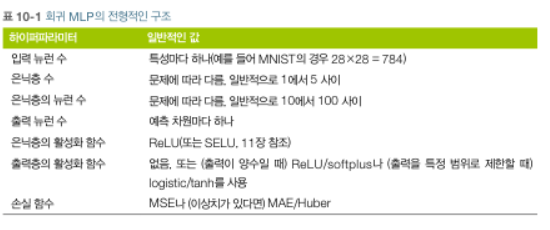

### 분류를 위한 다층 퍼셉트론
- 이진 분류 문제: 로지스틱 함수를 가진 하나의 출력 뉴런만 필요, 양성 클래스에 대한 예측
- 다중 레이블 이진 분류 문제 (스팸 or not, 긴급 or not)
  - 로지스틱 활성화 함수를 가진 여러 개의 출력 뉴런 필요, 합이 1이 될 필요 없음
- 다중 분류
  3개 이상의 클래스 중 한 클래스에만 속한다면, 클래스마다 하나의 출력 뉴런 필요함
  - 출력층: 소프트 맥스 활성화 함수 사용, 합이 1이 됨
  - 손실함수: 크로스 엔트로피 손실함수
- 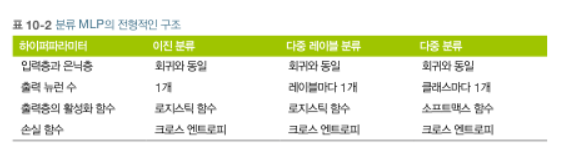

# <이번 주에 진행한 부분>

## 10.2 케라스로 다층 퍼셉트론 구현하기

- 케라스란
  - 모든 종류의 신경망을 손쉽게 만들도록, 훈련, 평가, 실행할 수 있는 고수준 딥러닝 API이다.

### 10.2.1 텐서플로 2 설치

In [ ]:
# 버전 확인
import tensorflow as tf
from tensorflow import keras
tf.__version__, keras.__version__

('2.9.2', '2.9.0')

 두 번째 버전이 tf.keras에서 구현된 케라스의 API 버전이다.

### 10.2.2 시퀀셜 API를 사용하여 이미지 **분류**기 만들기

#### 케라스를 사용하여 데이터셋 적재하기

In [ ]:
# 패션 MNIST 적재하기
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# 훈련 세트이 크기와 데이터 타입 확인하기
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [ ]:
# 검증 데이터 셋 만들기
# 입력 데이터의 스케일 조정: 픽셀 강도를 255.0으로 나누어 0~1 사이 범위로 조정한다.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
# 레이블에 해당하는 아이템 나타내기 위해 클래스 이름의 리스트 만들기
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

#### 시퀀셜 API를 사용하여 모델 만들기

In [ ]:
# 두 개의 은닉층으로 이루어진 분류용 다층 퍼셉트론
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

**코드 설명**
- 첫 번째 라인은 Sequential 모델을 만든다. 순서대로 연결된 층을 일렬로 쌓아서 구성한다. (Sequential API)
- 첫 번째 층을 만들고 모델에 추가한다. Flatten 층은 입력 이미지를 1차원 배열로 변환한다. 모델의 첫번 째 층이므로 input_shape을 지정해야한다.
- 뉴런 300개를 가진 Dense 은닉층을 추가한다. ReLU 활성화 함수를 사용한다.
- 뉴런 100개를 가진 두 번째 Dense 은닉층을 추가한다. ReLU 활성화 함수 사용한다.
- 마지막 층인 뉴런 10개를 가진 Dense 출력층을 추가한다. 소프트맥스 활성화 함수를 사용한다.

In [ ]:
# 위의 코드와 다른 버전
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 모델에 있는 모든 층 출력하기
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- 첫번째 은닉층은 784x300개의 연결 가중치와 300개의 편향을 가진다. 즉 235500의 파라미터가 생성된다.
- 이때 훈련 데이터가 많지 않은 경우, 과대 적합의 위험을 가진다.

In [ ]:
# 모델에 있는 층을 리스트로 출력하거나 인덱스로 층을 선택할 수 있다.
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1

In [ ]:
hidden1.name

'dense_3'

In [ ]:
model.get_layer('dense_3') is hidden1

True

In [ ]:
# 층의 모든 파라미터에 접근해보자
weights, biases = hidden1.get_weights()
weights, biases

(array([[ 2.80439854e-05, -4.84733693e-02, -5.68794794e-02, ...,
         -6.10664487e-03,  2.66997069e-02, -3.47224697e-02],
        [ 2.32021958e-02,  2.14777216e-02, -1.49768330e-02, ...,
         -3.52963433e-02, -5.05184382e-03, -2.14191489e-02],
        [ 2.72603855e-02, -5.75994030e-02, -3.07667702e-02, ...,
          6.33810461e-03, -3.51353176e-02,  4.45728302e-02],
        ...,
        [-3.36496122e-02, -4.01431061e-02,  6.14046603e-02, ...,
          4.36275452e-02,  4.16804105e-03, -3.62283252e-02],
        [ 3.80358845e-02,  1.51546225e-02, -2.45782733e-03, ...,
         -7.00794905e-02,  3.01420242e-02, -1.62576288e-02],
        [-2.86335982e-02, -4.38048542e-02,  2.02475116e-02, ...,
          5.10257781e-02, -4.66930047e-02, -8.03888589e-03]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights.shape, biases.shape

((784, 300), (300,))

- Dense 층은 연결 가중치를 무작위로 초기화하고, 편향은 0으로 초기화한다.
- 다른 초기화 방법은 11장에서 다루도록 한다.

#### 모델 컴파일
- 모델을 만든 후 사용할 손실 함수와 옵티마이저를 지정해야한다. 
- 또한 훈련과 평가 시에 계산할 지표를 추가로 지정할 수 있다.


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

**코드 설명**
- 레이블이 정수 하나로 이루어져 있고, 클래스가 배타적일 때 "sparse_categorical_crossentropy" 손실을 사용한다.
- 샘플마다 클래스별 타깃 확률을 가지고 있다면 "categorical_crossentropy" 손실을 사용해야한다.
- 옵티마이저에 "sgd"를 지정하면 경사하강법을 이용하여 모델을 훈련한다는 의미이다. 즉, 역전파 알고리즘을 수행한다. 11장에서 더 효율적인 옵티마이저를 다뤄보자

#### 모델 훈련과 평가

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7187 - accuracy: 0.7620 - val_loss: 0.5227 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4898 - accuracy: 0.8298 - val_loss: 0.4408 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4440 - accuracy: 0.8448 - val_loss: 0.4594 - val_accuracy: 0.8298
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4165 - accuracy: 0.8542 - val_loss: 0.4065 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3965 - accuracy: 0.8606 - val_loss: 0.3918 - val_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3811 - accuracy: 0.8645 - val_loss: 0.3676 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3683 - accuracy: 0.8706 - val_loss: 0.3616 - val_accuracy

- 케라스는 에포크가 끝날 때마다 검증 세트를 사용해 손실과 추가적인 측정 지표를 계산한다.
- 훈련 세트 성능이 검증 세트보다 월등히 높다면 모델이 과대적합되었을 것이다.

**TIP**
- validation_data 매개변수에 검증 세트를 전달하는 대신 케라스가 검증에 사용할 훈련 세트의 비율을 지정할 수 있다.
- validation_split=0.1로 쓰면 케라스는 섞기 전 훈련 데이터의 마지막 10%를 사용한다.

**가중치 부여**
- 훈련 세트의 클래스가 편중되어 있다면 fit() 메서드를 호출할 때 class_weigth 매개변수를 지정하는 것이 좋다.
  - 적게 등장하는 클래스는 높은 가중치를 부여하고, 많이 등장하는 클래스는 낮은 가중치를 부여한다.
- 샘플별로 가중치를 부여하고 싶다면 sample_weight 매개변수를 지정한다.

**History 객체**
- 훈련 파라미터(history.params), 수행된 에포크(history.epoch)가 포함된다.
- 딕셔너리 속성(history.history)
  - 훈련 세트와 검증 세트에 대한 손실과 측정한 지표를 담은 속성
  - 이 딕셔너리를 이용해 판다스 데이터 프레임을 만들고 plot() 메서드를 호출해서 학습 곡선을 볼 수 있다.

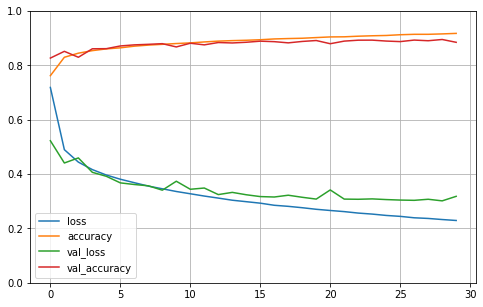

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 수직축의 범위를 0~1 사이로 설정
plt.show()

**해석**
- 훈련하는 동안 훈련 정확도와 검증 정확도가 꾸준히 상승하는 것을 볼 수 있다.
- 검증 곡선이 훈련 곡선과 가깝다. => 크게 과대적합되지 않았다.
- **훈련 곡선을 볼 때 왼쪽으로 에포크의 절반만큼 이동해서 생각하기**
  - 검증 손실은 에포크가 끝난 후에 계산되므로 훈련 손실 곡선은 에포크의 절반만큼 왼쪽으로 이동해야한다.
- 검증 손실이 여전히 감소한다면 모델이 완전히 수렴되지 않아 훈련을 계속해야하는 의미이다.
- 모델 성능이 만족스럽지 않으면 처음으로 되돌아가서 하이퍼 파라미터를 튜닝해야한다.
  1. 학습률 튜닝
  2. 다른 옵티마이저 테스트해보기
    1. 다시 1번으로
  3. 층 개수, 층의 뉴런 개수, 은닉층의 활성화 함수, 배치 크기 등 튜닝
- 모델의 성능이 만족스럽다면 테스트 세트로 모델 평가하기

In [ ]:
# 모델 평가
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3480 - accuracy: 0.8760


[0.3480343222618103, 0.8759999871253967]

- 테스트 세트에서는 하이퍼파라미터를 튜닝하려는 유혹을 참아야한다!!
- 그렇지 않으면 일반화 오차를 제대로 추정할 수 없다.

#### 모델을 사용해 예측을 만들기

In [ ]:
# 새로운 샘플에 대해 예측 만들기
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 152ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**코드 설명**
- 0에서 9까지 클래스마다 각각의 확률을 모델이 추정했다.

In [ ]:
# 가장 높은 확률을 가진 클래스만 출력하기
y_pred = model.predict(X_new).argmax(axis=-1)
y_pred

1/1 [==============================] - 0s 46ms/step


array([9, 2, 1])

### 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

#### 캘리포니아 주택 가격 데이터셋 적재하기

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

**분류와 차이점**
- 출력층이 활성화 함수가 없는 하나의 뉴런을 가진다.
- 손실 함수로 평균 제곱 오차를 사용한다.

In [ ]:
# 시퀀셜 API를 이용해 모델 만들기
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# 모델 컴파일
model.compile(loss="mean_squared_error",
              optimizer='sgd')
# 모델 훈련과 평가
history = model.fit(X_train, y_train, epochs=20,
              validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

# 모델 예측하기
X_new = X_test[:3]
y_pred = model.predict(X_new)

**결론**
- 시퀀셜 API는 사용하기 매우 쉽지만,
- 입력과 출력이 여러 개이거나 더 복잡한 네트워크 토폴로지를 갖는 신경망을 만들어야할 때 함수형(functional) API를 사용한다.

### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

- 순차적이지 않은 신경망 (ex Wide & Deep 신경망)
  - 입력의 일부 또는 전체가 출력층에 바로 연결된다. 
  - 신경망이 복잡한 패턴과 간단한 규칙을 모두 학습할 수 있다.

    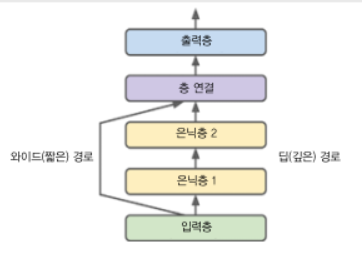
- 순차적인 신경망 (일반적인 MLP)
  - 층 전체에 모든 데이터를 통과시키기 때문에 데이터에 있는 간단한 패턴이 연속된 변환으로 왜곡될 수 있다.

In [ ]:
# 위 사진의 신경망 구현해보기
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

**코드 해석**
- Input 객체: shape과 dtype을 포함하여 모델의 입력을 정의한다. 여러 개의 입력을 가질 수 있다.
- 30개의 뉴런과 ReLU 활성화 함수를 가진 Dense 층을 만든다. 이 층은 만들어지자마자 입력과 함께 함수처럼 호출된다. (함수형API로 불리는 이유)
- 두 번째 은닉층을 만들고, 함수처럼 호출한다.
- Concatenate() 함수를 호출하여 두 번째 은닉층의 출력과 입력을 연결한다.
- 하나의 뉴런과 활성화 함수가 없는 출력층을 만들고 Concatenate 층이 만든 결과를 사용해 호출한다.
- 마지막으로 사용할 입력과 출력을 지정하여 케라스 Model을 만든다.

**또 다른 신경망**
- 일부 특성은 짧은 경로로 전달하고 다른 특성은 깊은 경로로 전달하고 싶다면?
  - 여러 입력을 사용하자
  
    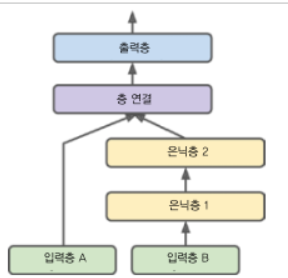

In [ ]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

- 모델 컴파일은 이전과 동일하지만 fit() 메서드를 호출할 때, 입력마다 하나씩 행렬의 튜플 (X_train_A, X_train_B)을 전달해야한다. X_valid, X_test, X_new에도 동일하게 적용된다.

In [ ]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 2.6705 - val_loss: 1.0520
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7761 - val_loss: 0.6704
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6335 - val_loss: 0.6216
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5984 - val_loss: 0.5881
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5802 - val_loss: 0.5869
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5666 - val_loss: 0.5615
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5548 - val_loss: 0.5463
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5443 - val_loss: 0.5405
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5351 - val_loss: 0.5370
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5265 - val_loss: 0.5193

# <다음 주에 진행할 부분>

**여러 개의 출력이 필요한 경우**

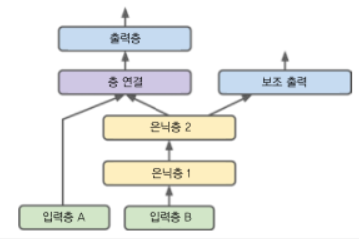


### 10.2.5 서브클래싱 API로 동적 모델 만들기
### 10.2.6 모델 저장과 복원
### 10.2.7 콜백 사용하기
### 10.2.8 텐서보드를 사용해 시각화하기

## 10.3 신경망 하이퍼파라미터

## 10.4 연습문제